In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Analysis Transport Company
As the transport company, we feel that the outcomes of the model are not enough to determine the costs of certain policies. We feel that allowing room for river in certain dikes will definitely decrease the water level, and lead to an economically less favourable outcome. To illustrate this, the following notebook analyses the economic effect of transport on the IJssel river.

In [32]:
# We import data from CBS which can help us determine this. The data can be found in the data directory.

eco_benefit = pd.read_csv('data/economic_benefit.csv', delimiter=';')
revenue = pd.read_csv('data/revenue_transport.csv', delimiter=';')
value = pd.read_csv('data/economic_value.csv', delimiter=';')
transport_to = pd.read_csv('data/transport_to.csv', delimiter=',')
transport_from = pd.read_csv('data/transport_from.csv', delimiter=',')

In [33]:
revenue['Jaar'] = revenue['Perioden'].apply(lambda x: x[:4])

In [34]:
total = revenue.merge(value,'left')

In [35]:
transport = transport_to.merge(transport_from)

We define transport as the sum of weight to parts of the IJssel and weight from these parts. This is then divided by the total weight transported in the Netherlands. This leaves us with the fraction transport going over the IJssel.

In [36]:
transport['sum'] = transport['Bruto gewicht gelost'] + transport['Bruto gewicht geladen']

In [37]:
relevant_transport = transport[transport['Coropnaam'].str.contains('Overijssel') | \
                               transport['Coropnaam'].str.contains('Achterhoek') | \
                               transport['Coropnaam'].str.contains('Twente')].copy()

In [38]:
total_relevant = relevant_transport['sum'].sum()

In [39]:
total_transport = transport['sum'].sum()

In [40]:
percentage = total_relevant/total_transport
print(f'The percentage of transport in the relevant provinces is: {round(percentage*100)}%')

The percentage of transport in the relevant provinces is: 6%


We then use this percentage as a way to convert the total added value of the transport sector specific to the IJssel.

In [41]:
total = total.fillna(0)

In [42]:
total['Toegevoegde waarde (miljard euro)'] = total['Toegevoegde waarde (miljard euro)'].apply(lambda x: str(x).replace(',','.'))

In [43]:
total['Toegevoegde waarde (miljard euro)'] = total['Toegevoegde waarde (miljard euro)'].astype(float)

In [44]:
total['Indexcijfers omzet (2015=100)'] = total['Indexcijfers omzet (2015=100)'].apply(lambda x: x.replace(',','.'))
total['Indexcijfers omzet (2015=100)'] = total['Indexcijfers omzet (2015=100)'].astype('float')

In [45]:
total['economic benefit'] = total['Toegevoegde waarde (miljard euro)']*percentage

In [46]:
total['revenue ijssel'] = total['Indexcijfers omzet (2015=100)']*percentage

/var/folders/lk/0x9d24vx0lxcjbyt8sqwmpx00000gn/T/ipykernel_4401/2264192071.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(total['Jaar'])


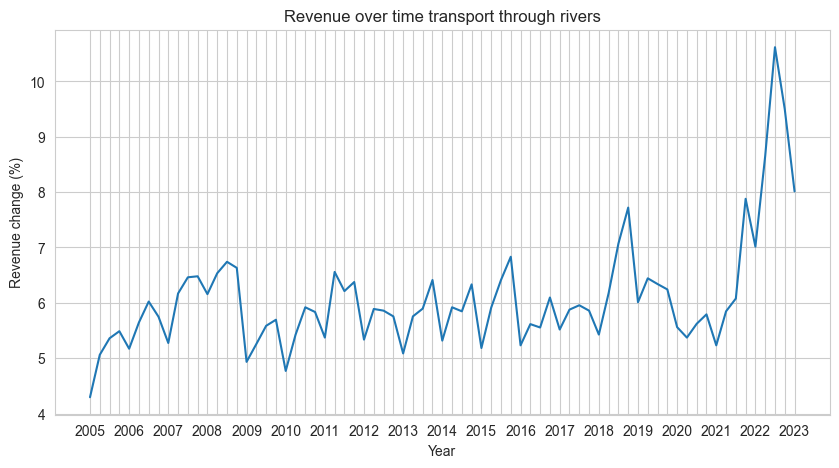

In [47]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot('Perioden', 'revenue ijssel', data=total)
ax.set_xticklabels(total['Jaar'])
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 4 != 0]

ax.set_xlabel('Year')
ax.set_ylabel('Revenue change (%)')
ax.set_title('Revenue over time transport through rivers')

plt.show()

The above graph shows the relative growth overtime of the revenue of transport, making it an extremely relevant sector to maintain.

In [48]:
total[total['Jaar']=='2019']

,Bedrijfstakken/branches (SBI 2008),Perioden,Indexcijfers omzet (2015=100),Omzetontwikkeling t.o.v. een jaar eerder (%),Jaar,Toegevoegde waarde (miljard euro),Werkgelegenheid (duizend vte),economic benefit,revenue ijssel
56,503-504 Binnenvaart,2019 1e kwartaal,98.8,"10,8",2019,2.654,19.0,0.161478,6.011299
57,503-504 Binnenvaart,2019 2e kwartaal,105.9,"4,3",2019,2.654,19.0,0.161478,6.443286
58,503-504 Binnenvaart,2019 3e kwartaal,104.2,"-10,3",2019,2.654,19.0,0.161478,6.339852
59,503-504 Binnenvaart,2019 4e kwartaal,102.6,"-19,1",2019,2.654,19.0,0.161478,6.242503


In [50]:
total[total['Jaar']=='2019'].groupby('Jaar').mean(numeric_only=True)['economic benefit']

Jaar
2019    0.161478
Name: economic benefit, dtype: float64

Finally, we surmise that transport over the IJssel river results in a revenue of 161 million.